In [21]:
%matplotlib inline


import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime as dt
import json
def pretty(obj):
    return json.dumps(obj, sort_keys=True, indent=2)
from IPython.display import display, HTML

import firvtools as firv

cwd = os.getcwd()
dataDir = cwd+"/depo/Data/"
saveDir = cwd+"/depo/Outputs/"
dataSrc = "G4swaps12082016.csv"


In [22]:

swapRates = pd.read_csv(dataDir+dataSrc, sep=",")

## set dates to index
swapRates["Dates"] = pd.to_datetime(swapRates["Dates"], infer_datetime_format=True)
swapRates.set_index("Dates", drop=True, inplace=True)

print("Done")

Done


First, load the raw data and re-save it by currency. 

In [24]:
#swapRates.info()

swapRates = swapRates.apply(pd.to_numeric, errors='coerce')

swapRates.head()

## Create a dataframe for each currency
grouped = swapRates.groupby(lambda x: x[:3], axis=1)

ccylist = []

for name, group in grouped:
    df = group.copy()
    df.dropna(how='all', inplace=True)
    print (df.head())
    df.to_pickle(dataDir+name)
    ccylist.append(name)
    print ("Saved "+name+" to Pickle.")
    

             EUR1    EUR2    EUR3    EUR4   EUR5   EUR6   EUR7  EUR10  EUR12  \
Dates                                                                          
2016-12-08 -0.203 -0.1629 -0.0950  0.0168  0.128  0.259  0.396  0.764  0.952   
2016-12-07 -0.195 -0.1480 -0.0800  0.0223  0.135  0.261  0.391  0.742  0.918   
2016-12-06 -0.195 -0.1430 -0.0635  0.0302  0.155  0.284  0.416  0.770  0.949   
2016-12-05 -0.198 -0.1545 -0.0880  0.0010  0.111  0.236  0.366  0.717  0.892   
2016-12-02 -0.199 -0.1570 -0.1100 -0.0245  0.081  0.202  0.328  0.676  0.850   

             EUR15  EUR20   EUR25  EUR30  EUR40  
Dates                                            
2016-12-08  1.1430  1.296  1.3410  1.359  1.349  
2016-12-07  1.0980  1.239  1.2770  1.290  1.282  
2016-12-06  1.1310  1.272  1.3110  1.323  1.315  
2016-12-05  1.0710  1.211  1.2490  1.261  1.253  
2016-12-02  1.0285  1.168  1.2065  1.219  1.211  
Saved EUR to Pickle.
             GBP1   GBP2    GBP3    GBP4   GBP5    GBP6    GBP7   GB

Saved everything to our data directory. Now, let's reload them into a dictionary for use later.

In [4]:

ccys = dict.fromkeys(ccylist)

for name in ccylist:
    ccys[name] = pd.read_pickle(dataDir+name)
    

Let's try displaying or plotting it.

In [5]:

for ccy in ccys.keys():
    ccys[ccy].dropna(how='all', inplace=True)
    print (ccys[ccy].tail())

            JPY1   JPY2   JPY3   JPY4   JPY5  JPY6   JPY7  JPY10  JPY12  \
Dates                                                                     
1995-01-06   NaN  3.280  3.750  4.130  4.370   NaN  4.750  4.840    NaN   
1995-01-05   NaN  3.265  3.765  4.145  4.375   NaN  4.745  4.845    NaN   
1995-01-04   NaN  3.270  3.770  4.125  4.360   NaN  4.730  4.830    NaN   
1995-01-03   NaN  3.160  3.620  4.020  4.250   NaN  4.630  4.730    NaN   
1995-01-02   NaN  3.135  3.605  4.005  4.235   NaN  4.615  4.715    NaN   

            JPY15  JPY20  JPY25  JPY30  
Dates                                   
1995-01-06    NaN    NaN    NaN    NaN  
1995-01-05    NaN    NaN    NaN    NaN  
1995-01-04    NaN    NaN    NaN    NaN  
1995-01-03    NaN    NaN    NaN    NaN  
1995-01-02    NaN    NaN    NaN    NaN  
            GBP1  GBP2  GBP3  GBP4  GBP5  GBP6  GBP7  GBP10  GBP12  GBP15  \
Dates                                                                       
1995-01-06   NaN  8.47  8.77  8.8

In [6]:
## Create Fwd Historicals for EUR and GBP
## Check what tenors exist.
## firv has maturity and approx PV01s.

parEur = ccys["EUR"].copy()
newCols = [x[3:]+"y" for x in parEur.columns.values]
parEur.columns = newCols

{'40y': 2629.79, '20y': 1629.8800000000001, '2y': 198.22, '3y': 294.66000000000003, '30y': 2187.7399999999998, '1y': 99.420000000000002, '12y': 1073.25, '10y': 914.99000000000001, '7y': 661.78999999999996, '5y': 482.24000000000001, '6y': 573.08000000000004, '4y': 389.30000000000001, '25y': 1925.46, '15y': 1295.3900000000001}


,1y,2y,3y,4y,5y,6y,7y,10y,12y,15y,20y,25y,30y,40y
Dates,,,,,,,,,,,,,,
2016-12-08,-0.203,-0.1629,-0.0950,0.0168,0.128,0.259,0.396,0.764,0.952,1.1430,1.296,1.3410,1.359,1.349
2016-12-07,-0.195,-0.1480,-0.0800,0.0223,0.135,0.261,0.391,0.742,0.918,1.0980,1.239,1.2770,1.290,1.282
2016-12-06,-0.195,-0.1430,-0.0635,0.0302,0.155,0.284,0.416,0.770,0.949,1.1310,1.272,1.3110,1.323,1.315
2016-12-05,-0.198,-0.1545,-0.0880,0.0010,0.111,0.236,0.366,0.717,0.892,1.0710,1.211,1.2490,1.261,1.253
2016-12-02,-0.199,-0.1570,-0.1100,-0.0245,0.081,0.202,0.328,0.676,0.850,1.0285,1.168,1.2065,1.219,1.211


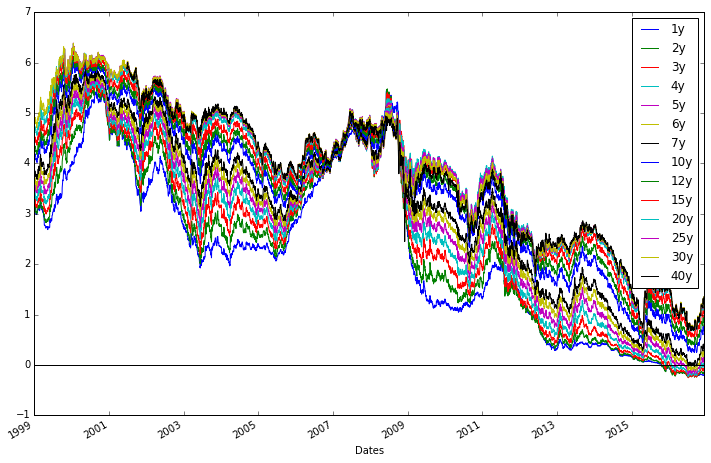

In [7]:

print (firv.pv01d)
display(parEur.head())
p1 = parEur.plot(figsize=(12,8))
p1.legend(loc="best")
p1.axhline(0, color="black")

Next let's convert them to forwards. This is approximate as the PV01s change over time.

In [8]:
fwdEur = pd.DataFrame(index=parEur.index.values)
#fwdEur["20y5y"] = 100*(parEur["25y"]*firv.pv01d["25y"]-parEur["20y"]*firv.pv01d["20y"])/(firv.pv01d["25y"] - firv.pv01d["20y"])

def calcFwdRate(r1, r2, t1, t2, pv01s=firv.pv01d):
    p1 = pv01s[t1]
    p2 = pv01s[t2]
    return (p2*r2-p1*r1)/(p2-p1)

print (calcFwdRate(129.6, 134.1, "20y", "25y"))
display(fwdEur.head())

158.913789837


""
2016-12-08
2016-12-07
2016-12-06
2016-12-05
2016-12-02


,1y,1y1y,2y1y,3y1y,4y1y,5y1y,6y1y,7y3y,10y2y,12y3y,15y5y,20y5y,25y5y,30y10y
2016-12-08,56.4,71.246437,93.437101,114.634827,134.868367,152.701541,169.195344,192.285612,201.815620,196.482714,177.363658,150.182989,133.444533,105.515013
2016-12-07,56.7,71.747065,92.614952,110.521344,131.792877,127.959445,185.729782,187.917389,200.711010,192.766431,173.395475,145.098453,136.130224,107.079368
2016-12-06,56.9,73.953340,96.503679,117.537523,135.176652,156.367970,169.659510,194.235612,204.443776,199.407425,178.589112,149.903028,141.767523,108.262467
2016-12-05,56.7,72.549575,93.014952,112.155389,129.898515,145.823734,167.095344,186.210537,197.937464,194.348996,173.289112,145.580154,136.617523,114.415715
2016-12-02,57.0,71.244555,93.737101,112.055389,129.279643,155.402180,158.374140,191.125175,195.499789,196.898420,175.363658,160.494781,139.673874,103.487928


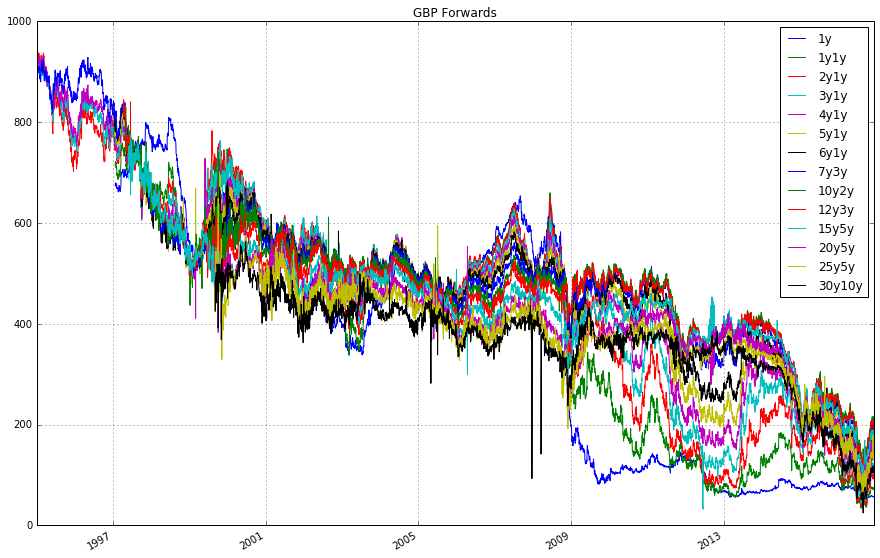

In [29]:
# we should write a function.

def computeFwds(data, pv01s = firv.pv01d):
    
    newParCols = [x[3:]+"y" for x in data.columns.values]
    par = data.copy()
    par.columns = newParCols

    fwds = pd.DataFrame(par[newParCols[0]]*100, index=par.index.values)
    parCols = par.columns.values
    allFwds = [parCols[i]+str(int(parCols[i+1][:-1])-int(parCols[i][:-1]))+"y" for i in range(len(parCols)-1)]

    for i in range(len(allFwds)):
        t1, t2 = str(parCols[i]), str(parCols[i+1])
        p1, p2 = pv01s[t1], pv01s[t2]
        r1, r2 = par[t1], par[t2]
        fwds[allfwds[i]] = 100*(r2*p2-r1*p1)/(p2-p1)
    
    return fwds


parCols = parEur.columns.values
allfwds = [parCols[i]+str(int(parCols[i+1][:-1])-int(parCols[i][:-1]))+"y" for i in range(len(parCols)-1)]

parGBP = ccys["GBP"]
fwdGBP = computeFwds(parGBP)

display(fwdGBP.head())

p2 = fwdGBP.plot(figsize=(15,10), title="GBP Forwards", grid=True)
p2.legend(loc="best")
p2.axhline(0, color="black")


Ok great, let's save the forwards now.

JPY
GBP
EUR
USD
Saved JPY forwards.
Saved GBP forwards.
Saved EUR forwards.
Saved USD forwards.


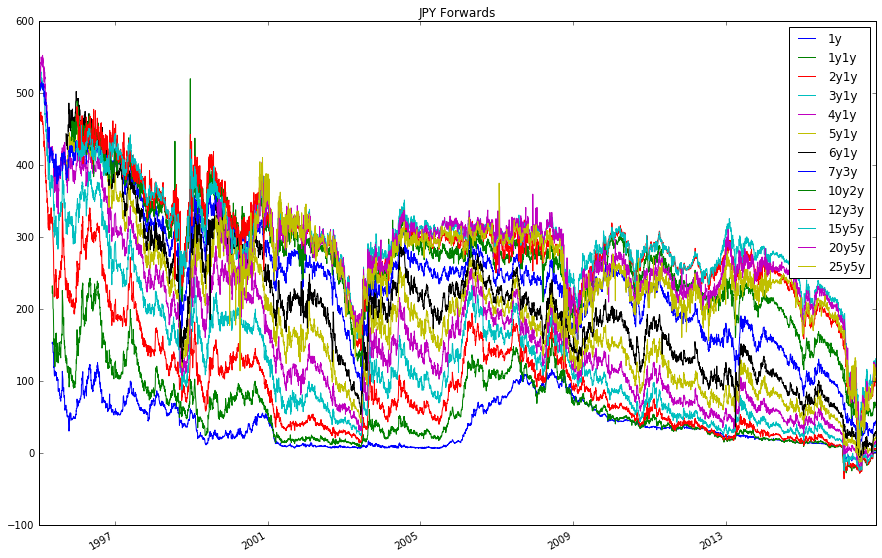

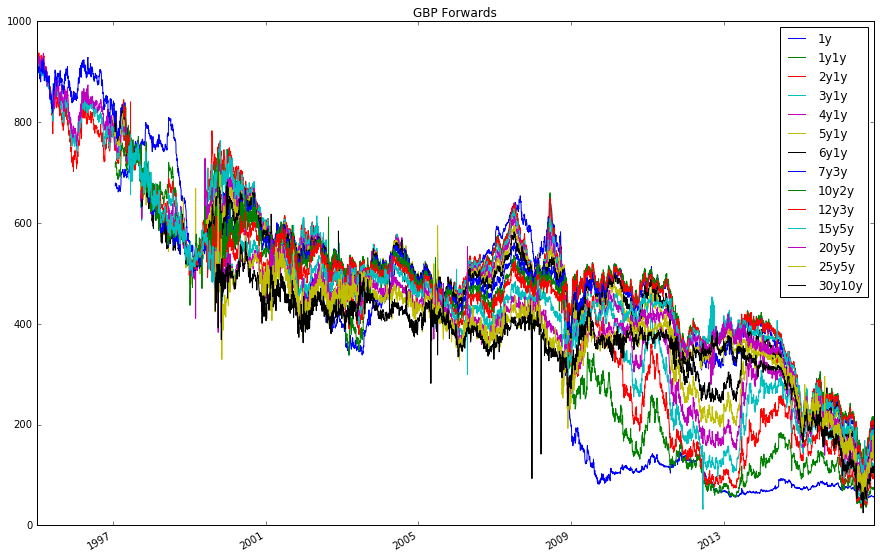

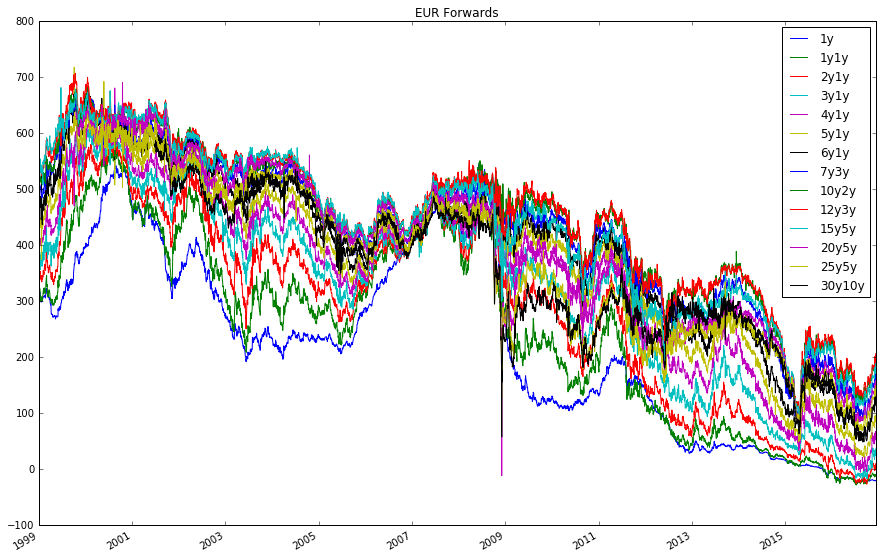

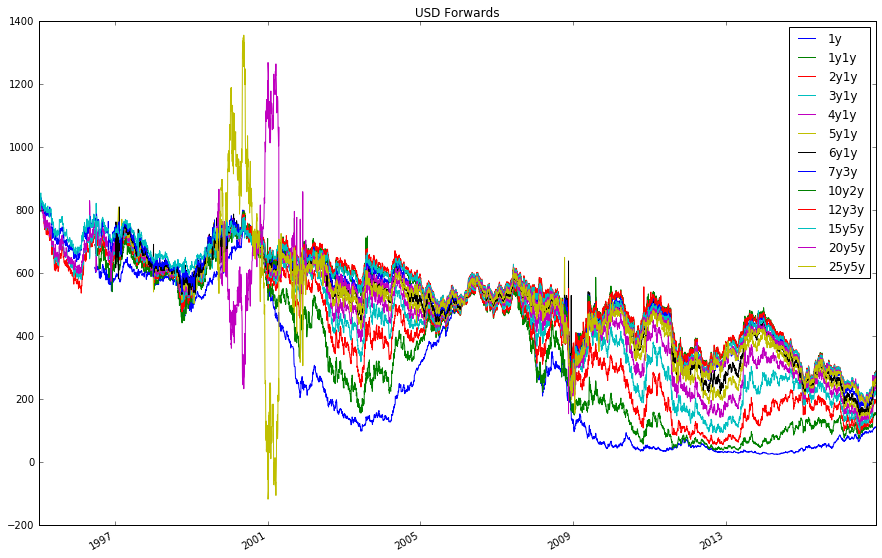

In [30]:
for ccy in ccys:
    print (ccy)

for ccy in ccys:
    fwd = computeFwds(ccys[ccy])
    fwd.plot(figsize=(15, 10), title=ccy+" Forwards")
    fwd.to_pickle(dataDir+"fwd"+ccy)

    print ("Saved "+ccy+" forwards.")